# Lesson 3 Assignment - Monty Hall Simulation
## Author - Rodolfo Lerma

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



### Workplace Scenario

Taylor from Marketing is headed to Burbank, California to visit family and jokes about having a strategy to win a car on a game show. You advocate for making a wise decision and sticking with it. But Taylor needs to see the proof in the data to be convinced.

## Monty Hall Simulation Code

In [1]:
#Import libraries
import numpy
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
#Function to show the door with no prize
def alternative_door(prize_door, players_door, number_of_doors = 3): #The default value for the number of doors is 3 (as for this example)
  i = 1
  while (i == prize_door or i== players_door ):
    i = (i+1)%(number_of_doors)
  return i

In [3]:
#Function for the player to switch to other door (unopened):
def switch_door(opened_door, players_door, number_of_doors = 3): #The default value for the number of doors is 3 (as for this example)
  i = 1
  while (i == opened_door or i== players_door ):
    i = (i+1)%(number_of_doors)
  return i

In [4]:
#Function to simulate the Monty Hall Game 
def monty_hall(switch_option, num_of_simulations, number_of_doors = 3):
    
    '''Input needed for this function:
    switch_option = True or False
    number_of_simulations = Number of times the game will be played
    number_of_doors = Number of doors in this game (by default the number is set to 3)
    
    The function will return the number of times the player won a car or a goat depending 
    on if he/she switched or not
    '''
    #Set the initial count to 0
    ws = 0
    wns = 0
    ls = 0
    lns = 0
    for i in range(0,num_of_simulations): #iteration on the number of simulations input by user
        prize_door = random.randint(0,number_of_doors-1)
        players_door = random.randint(0,number_of_doors-1)
        door_no_prize = alternative_door(prize_door,players_door,number_of_doors = 3)
        if switch_option == True:
            players_new_door = switch_door(door_no_prize,players_door,number_of_doors = 3)
            if players_new_door == prize_door:
                ws = ws + 1
            else:
                ls = ls + 1
        elif switch_option == False:
            if players_door == prize_door:
                wns = wns + 1
            else:
                lns = lns + 1
        else:
            print('Verify the input values')
    return ws, wns, ls, lns, num_of_simulations

In [5]:
#Function to run the game N number of times (user's entry) for both conditions (switching and not switching)
def monty_hall_simulation(number_of_simulations):
    '''Input needed for this function:
    Number of simulations that the user wants to see
    
    The function will return a list of lists with the each individual number of simulations and percentage
    of winnings and loosings for the 2 conditions (switching or not switching)
    '''
    
    simulation = []
    win_percentage_switch = []
    lose_percentage_switch = []
    win_percentage_not_switch = []
    lose_percentage_not_switch = []
    for i in range(1,number_of_simulations):
        simulation.append(i)
        z = monty_hall(True, i)
        win_percentage_switch.append((z[0]/z[4])*100)
        lose_percentage_switch.append((z[2]/z[4])*100)
    for i in range(1,number_of_simulations):
        z = monty_hall(False, i)
        win_percentage_not_switch.append((z[1]/z[4])*100)
        lose_percentage_not_switch.append((z[3]/z[4])*100)
    return simulation, win_percentage_switch, lose_percentage_switch, win_percentage_not_switch, lose_percentage_not_switch

## Monty Hall Simulation Example

Once the code has been completed in the next section a simulation with N number of cases will be run. For this particular example 200 is the number of simulations.

In [6]:
x = monty_hall_simulation(200)

In [7]:
#Splitting the data frame to each particular list
a = x[0] #simulation_num
b = x[1] #win_percentage_switch
c = x[2] #lose_percentage_switch
d = x[3] #win_percentage_not_switch
e = x[4] #lose_percentage_not_switch

In [8]:
#Making a list of lists to change it to a data frame
y = [a,b,c,d,e]
df = pd.DataFrame(y).transpose()
df.columns = ['Simulation','WS(%)','LS(%)','WNS(%)','LNS(%)'] #Assigning names to the columns

In [9]:
df.head(10) #Quick look a the first 10 rows

,Simulation,WS(%),LS(%),WNS(%),LNS(%)
0,1.0,100.000000,0.000000,0.000000,100.000000
1,2.0,50.000000,50.000000,50.000000,50.000000
2,3.0,66.666667,33.333333,100.000000,0.000000
3,4.0,75.000000,25.000000,50.000000,50.000000
4,5.0,60.000000,40.000000,60.000000,40.000000
5,6.0,66.666667,33.333333,16.666667,83.333333
6,7.0,71.428571,28.571429,57.142857,42.857143
7,8.0,50.000000,50.000000,25.000000,75.000000
8,9.0,55.555556,44.444444,33.333333,66.666667
9,10.0,60.000000,40.000000,60.000000,40.000000


### Statistics Summary Table

In [10]:
#Getting the statistical summary for these simulations
h = df.describe()
h

,Simulation,WS(%),LS(%),WNS(%),LNS(%)
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,67.206831,32.793169,33.612317,66.387683
std,57.590508,6.652250,6.652250,8.917616,8.917616
min,1.000000,46.666667,0.000000,0.000000,0.000000
25%,50.500000,63.597843,29.773858,29.595918,63.014212
50%,100.000000,67.142857,32.857143,33.108108,66.891892
75%,149.500000,70.226142,36.402157,36.985788,70.404082
max,199.000000,100.000000,53.333333,100.000000,100.000000


**Here are the description of the columns' names from the above table:**

**`WS(%)`** -> Winning the Car by Switching Doors

**`LS(%)`** -> Winning a Goat by Switching Doors (Losing a Car)

**`WNS(%)`** -> Winning the Car by Non Switching Doors

**`LNS(%)`** -> Winning the Goat by Non Switching Doors (Losing a Car)

### Box Plot of the Simulation

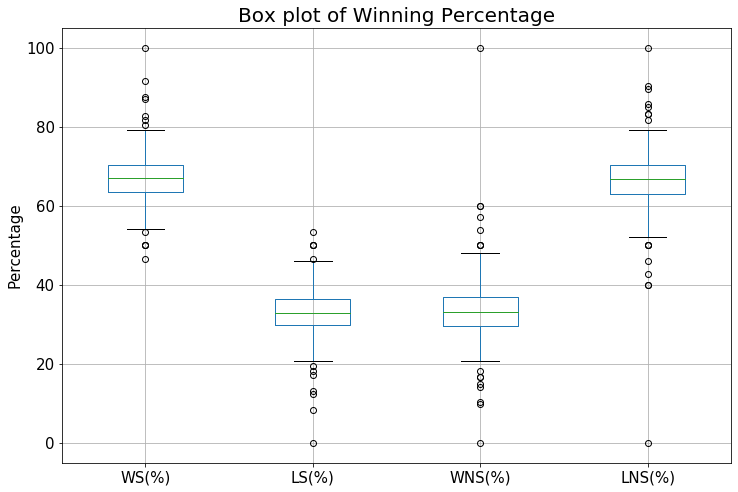

In [11]:
#Box plots for the 4 options based on the 2 conditions (switching or not switching)
plt.figure(figsize=(12, 8))
df.boxplot(column = ['WS(%)','LS(%)','WNS(%)','LNS(%)'])
plt.title('Box plot of Winning Percentage', fontsize = 20) # Give the plot a main title
plt.ylabel('Percentage', fontsize = 15)# Set text for y axis
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [12]:
h.head(4)

,Simulation,WS(%),LS(%),WNS(%),LNS(%)
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,67.206831,32.793169,33.612317,66.387683
std,57.590508,6.652250,6.652250,8.917616,8.917616
min,1.000000,46.666667,0.000000,0.000000,0.000000


From the box plot figure and the summary table above that for this example (with 200 simulations) we can notice the following:
- If you Switch doors in average you get 66.6% (~2/3) chances to win the Car with a Std Dev of ~8.68
- If you do not Switch doors in average you get 32.51% (~1/3) chances to win the Car with a Std Dev of ~

### Histagram of the simulation

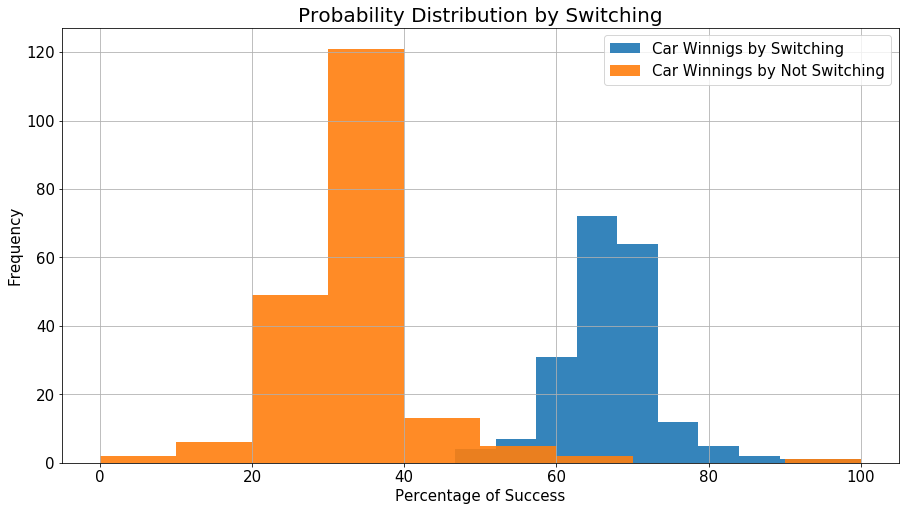

In [13]:
plt.figure(figsize=[15,8])
plt.hist(df['WS(%)'], label='Car Winnigs by Switching', alpha=0.9)
plt.hist(df['WNS(%)'], label='Car Winnings by Not Switching', alpha=0.9)
plt.xlabel('Percentage of Success', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Probability Distribution by Switching', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.legend(fontsize = 15)
plt.show()

Here we can see the different shift in the distributions by switching doors. As it was seen before if you not switch the average percentage of success is around 33%, but by switching doors you double your changes of winning the Car

### Run chart of the Simulation

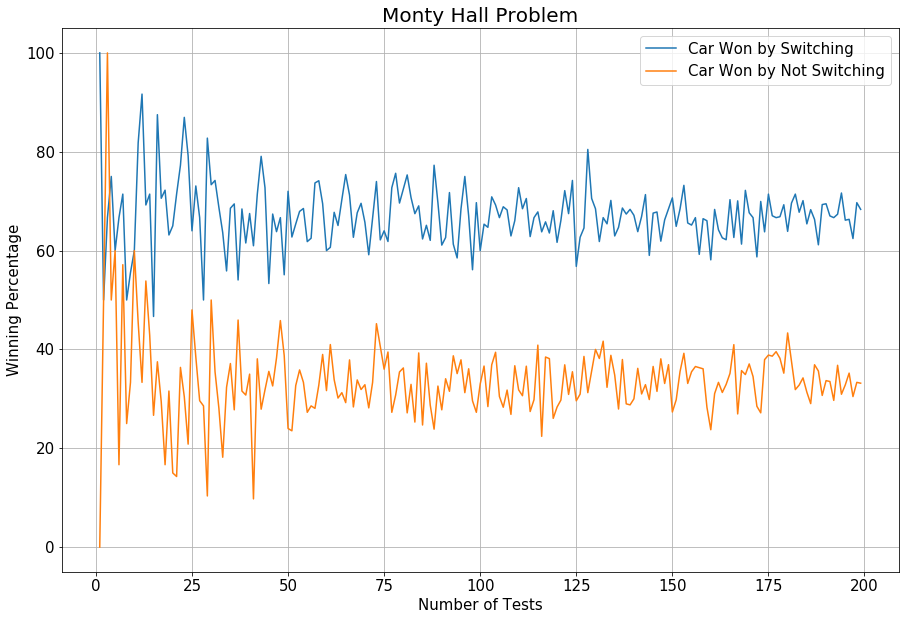

In [14]:
plt.figure(figsize=(15,10))
plt.title('Monty Hall Problem',fontsize=20)
plt.xlabel('Number of Tests',fontsize=15)
plt.ylabel('Winning Percentage',fontsize=15)
plt.plot(df['Simulation'], df['WS(%)'], label='Car Won by Switching')
plt.plot(df['Simulation'], df['WNS(%)'], label='Car Won by Not Switching')
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.show()

Here we can see the different shift in the distributions by switching doors

## Conclusion:

As it was shown above by switching doors in the game your chances of winning the Car go from ~33% (1/3) to ~66% (2/3). Therefore it is clear to see that the best strategy for this game is to **Switch Doors**